# 비지도 학습
## K-means 군집 분석

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df['species'] = LabelEncoder().fit_transform(df['species'])

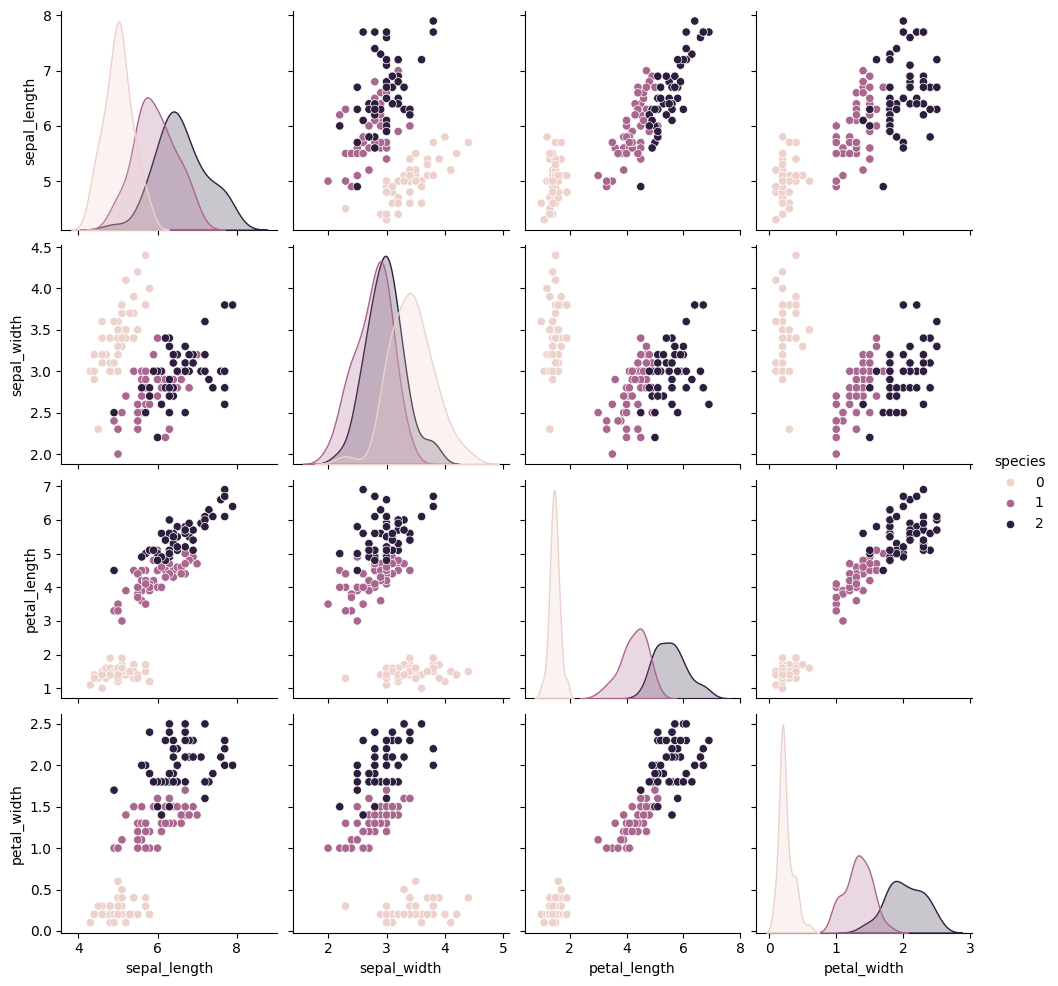

In [12]:
sns.pairplot(df, hue='species')

In [13]:
df_copy = df.copy()
# df_copy.drop('species', axis=1, inplace=True)
df_copy2 = df_copy.drop('species', axis=1)
df_copy = df_copy2.copy()

In [14]:
cluster1 = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42, algorithm='lloyd')
cluster1.fit(df_copy)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,500
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [15]:
# 결과 값을 변수에 저장
cluster_center = cluster1.cluster_centers_  # 각 군집의 중심점 결과 저장
cluster_prediction = cluster1.predict(df_copy)  # 각 예측군집 결과 저장

print(pd.DataFrame(cluster_center))  # 클러스터 중심점 출력
print("군집 예측 결과")
print(cluster_prediction)  # 클러스터링 결과 출력
print("실제 군집 자료")
print(df['species'].ravel())  # 정답 데이터 출력 (옆으로 출력 명령)

          0         1         2         3
0  5.901613  2.748387  4.393548  1.433871
1  5.006000  3.428000  1.462000  0.246000
2  6.850000  3.073684  5.742105  2.071053
군집 예측 결과
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
실제 군집 자료
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10264\3184529394.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(df['species'].ravel())  # 정답 데이터 출력 (옆으로 출력 명령)


In [16]:
print(df['species'].to_numpy())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
df_copy['cluster'] = cluster_prediction
df_copy

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
# print(df_copy["cluster"].ravel()) # 클러스터링 결과 출력
# print(df["species"].ravel()) # 정답 데이터 출력
# aa = df_copy["cluster"].replace([0, 1, 2], ['a' , 'b', 'c'])
# aa = aa.replace(['a', 'b', 'c'], [1, 0, 2])
# print(aa.ravel())

# df_copy["cluster"] = aa
# df_copy["species"] = df["species"]

In [19]:
print(df_copy["cluster"].to_numpy()) # 예측 cluster
print(df["species"].to_numpy()) # 정답 데이터

aa = df_copy["cluster"].replace([0, 1, 2], [7, 8, 9])
aa = aa.replace([7, 8, 9], [1, 0, 2])

print(aa.to_numpy())# 변환 결과

# 변환 결과를 cluster 컬럼에 적용
df_copy["cluster"] = aa
df_copy["species"] = df["species"]
df_copy

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


,sepal_length,sepal_width,petal_length,petal_width,cluster,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


[cluster 군집화 결과]


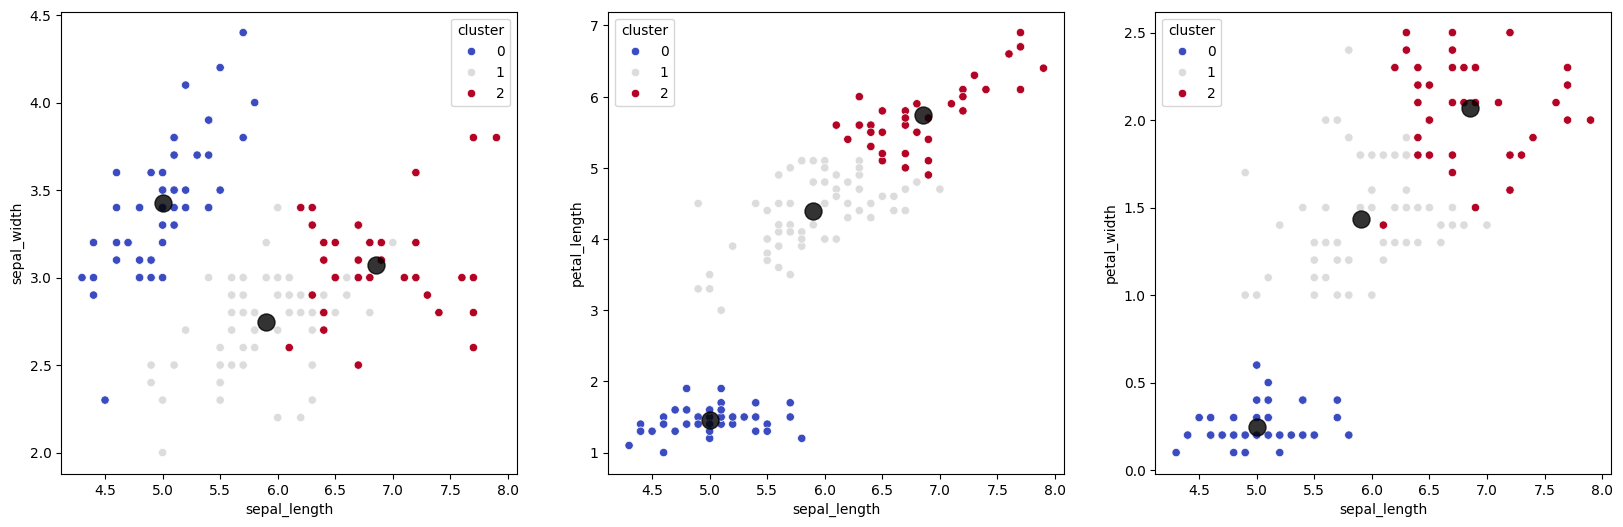

[species 원본]


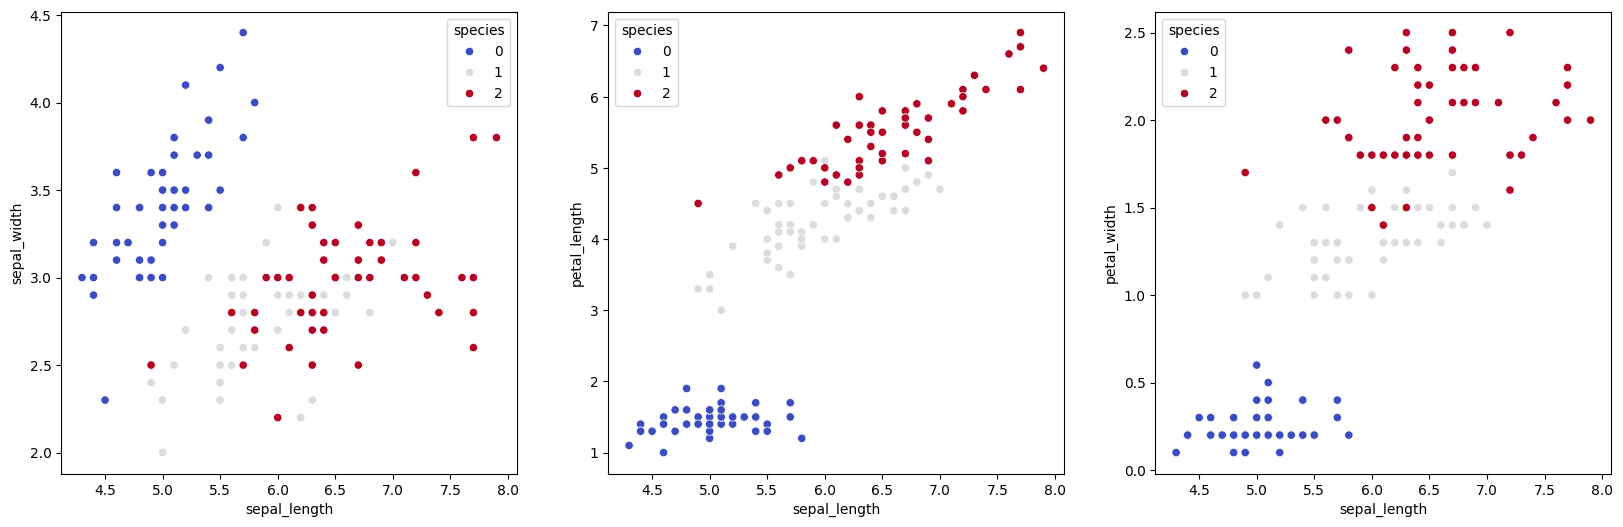

In [20]:
print("[cluster 군집화 결과]")
# 군집화 결과
plt.figure(figsize=(20, 6))
X = df_copy

plt.subplot(131)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], data=X, hue="cluster", palette="coolwarm")
plt.scatter(cluster_center[:, 0], cluster_center[:, 1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], data=X, hue="cluster", palette="coolwarm")
plt.scatter(cluster_center[:, 0], cluster_center[:, 2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 3], data=X, hue="cluster", palette="coolwarm")
plt.scatter(cluster_center[:, 0], cluster_center[:, 3], c='black', alpha=0.8, s=150)

plt.show()

print("[species 원본]")
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], data=X, hue="species", palette='coolwarm')

plt.subplot(132)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], data=X, hue="species", palette='coolwarm')

plt.subplot(133)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 3], data=X, hue="species", palette='coolwarm')

plt.show()

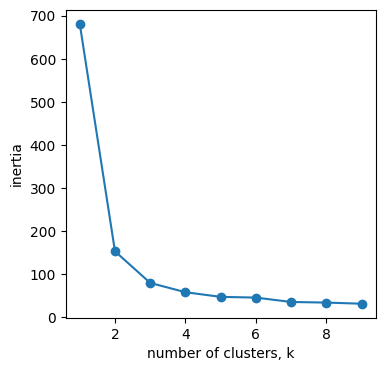

In [22]:
scope = range(1,10)
inertias = []
for k in scope:
    cluster1 = KMeans(n_clusters = k)
    cluster1.fit(df_copy2)
    inertias.append(cluster1.inertia_) # 각 군집별 오차의 제곱의 합으로 군집 내 분산으로 정의

plt.figure(figsize=(4, 4))
plt.plot(scope, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

## 실루엣 스코어

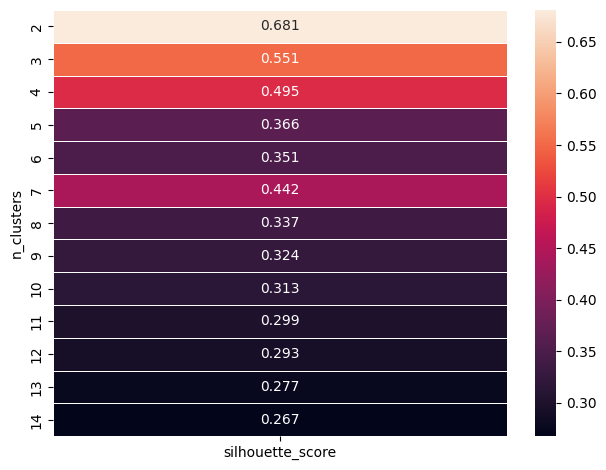

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(df_copy2)